In [1]:
ind_lasso = read.csv('../results_summary/sim_ind_lasso.txt', sep='\t')
ind_elnet = read.csv('../results_summary/sim_ind_elnet.txt', sep='\t')
ind_rf = read.csv('../results_summary/sim_ind_rf.txt', sep='\t')
ind_compLasso = read.csv('../results_summary/sim_ind_compLasso.txt', sep='\t')

ind_lasso$method = rep('lasso', dim(ind_lasso)[1])
ind_elnet$method = rep('elnet', dim(ind_elnet)[1])
ind_rf$method = rep('rf', dim(ind_rf)[1])
ind_compLasso$method = rep('compLasso', dim(ind_compLasso)[1])

In [2]:
dim(ind_lasso)
dim(ind_elnet)
dim(ind_rf)
dim(ind_compLasso)

[1] 16 13

[1] 16 13

[1] 16 16

[1] 16 13

In [3]:
ind_rf = ind_rf[!names(ind_rf)%in% c('OOB', 'OOB_mean', 'Index')]
dim(ind_rf)

[1] 16 13

In [4]:
ind = rbind(ind_lasso, ind_elnet)
ind = rbind(ind, ind_rf)
ind = rbind(ind, ind_compLasso)
dim(ind)

[1] 64 13

In [5]:
# fix false positives: when nothing was selected, then fp should be zero
# fp is now 1 due to length(setdiff(0/NA)) = 1 when actually should be 0 (in cv_sim_apply.R)
ind$FP_mean[ind$num_select ==0] = 0

In [6]:
write.table(ind, '../results_summary/table_ind_all.txt', sep='\t', row.names=F)

In [7]:
ind[order(ind$N, ind$P, decreasing=T), c('N', 'P', 'method', 'Stab', 'MSE_mean', 'FP_mean', 'FN_mean', 'num_select', 'FDR')][1:20, ]

,N,P,method,Stab,MSE_mean,FP_mean,FN_mean,num_select,FDR
16,1000,1000,lasso,0.64,0.27,4.39,0.00,9.39,0.26
32,1000,1000,elnet,0.15,0.27,34.60,0.00,39.65,0.79
48,1000,1000,rf,0.09,0.85,41.70,0.99,46.78,0.89
64,1000,1000,compLasso,0.96,1.16,0.24,0.00,6.24,0.03
12,1000,500,lasso,0.72,0.27,3.35,0.00,8.35,0.21
28,1000,500,elnet,0.18,0.26,27.20,0.00,32.21,0.77
44,1000,500,rf,0.19,0.78,18.70,0.84,23.89,0.78
60,1000,500,compLasso,0.96,1.24,0.25,0.00,6.25,0.03
8,1000,100,lasso,0.82,0.27,2.25,0.00,7.25,0.15
24,1000,100,elnet,0.23,0.26,17.00,0.00,22.05,0.69


### data visualization

In [9]:
library(ggplot2)
ind$N = as.factor(ind$N)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
fig_num_select <- ggplot(ind, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Independent") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) +
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_ind_num_select.pdf', height=5, width=5.5)

In [11]:
figt_stab <- ggplot(ind, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Independent") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_ind_Stab.pdf', height=5, width=5.5)

In [12]:
figt_mse <- ggplot(ind, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Independent") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_ind_MSE.pdf', height=5, width=5.5)

In [13]:
figt_FP <- ggplot(ind, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Independent") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_ind_FP.pdf', height=5, width=5.5)

In [14]:
figt_FN <- ggplot(ind, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Independent") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_ind_FN.pdf', height=5, width=5.5)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: magrittr


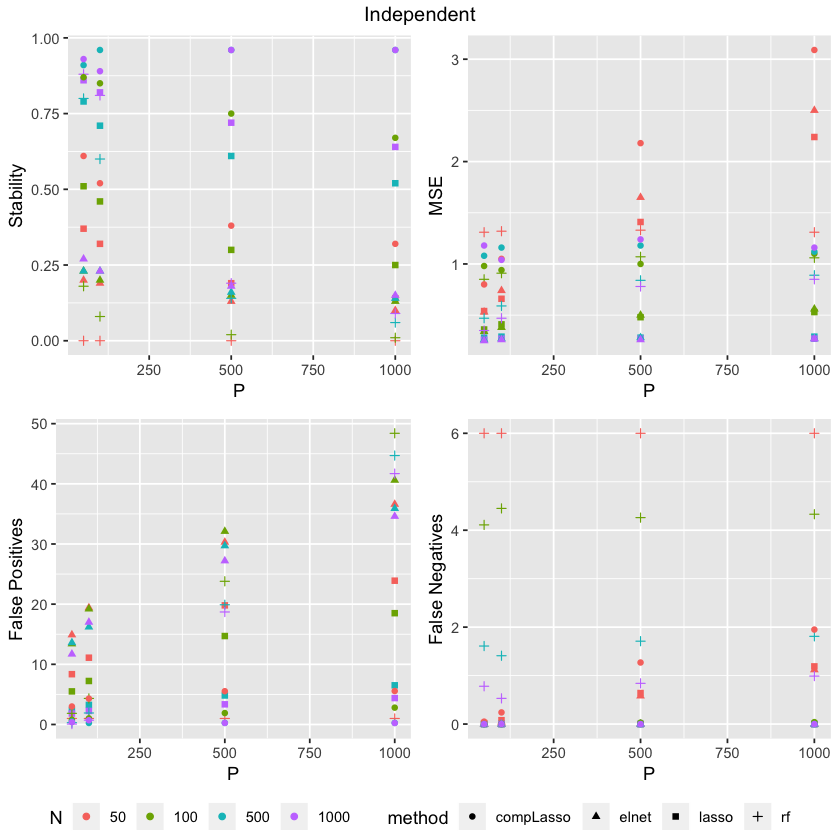

In [6]:
library(ggplot2)
library(ggpubr)
ind$N = as.factor(ind$N)
fig_ind_stab = ggplot(ind, aes(x=P, y=Stab, color=N)) + geom_point(aes(shape=method)) + ylab('Stability')
fig_ind_mse = ggplot(ind, aes(x=P, y=MSE_mean, color=N)) + geom_point(aes(shape=method)) + ylab('MSE')
fig_ind_fp = ggplot(ind, aes(x=P, y=FP_mean, color=N)) + geom_point(aes(shape=method)) + ylab('False Positives')
fig_ind_fn = ggplot(ind, aes(x=P, y=FN_mean, color=N)) + geom_point(aes(shape=method)) + ylab('False Negatives')
fig = ggarrange(fig_ind_stab, fig_ind_mse, fig_ind_fp, fig_ind_fn, ncol=2, nrow=2, 
          common.legend = TRUE, legend="bottom") 
fig = annotate_figure(fig, top = text_grob("Independent"))
fig

In [8]:
ggexport(fig, filename = "../figures_sim/figure_ind_summary.pdf", height=8, width=8)

file saved to ../figures_sim/figure_ind_summary.pdf


### plot relationship between MSE, Stab, FP, FN

In [88]:
dat = read.csv('../results_summary/table_ind_all.txt', sep='\t')
head(dat)

N,P,Ratio,Stab,MSE,FP,FN,num_select,MSE_mean,FP_mean,FN_mean,method
50,50,1.00,0.37,0.54 ( 0.03 ),8.36 ( 0.45 ),0.02 ( 0.01 ),13.34,0.54,8.36,0.02,lasso
100,50,0.50,0.51,0.36 ( 0.01 ),5.5 ( 0.42 ),0 ( 0 ),10.50,0.36,5.50,0.00,lasso
500,50,0.10,0.79,0.28 ( 0 ),2.33 ( 0.14 ),0 ( 0 ),7.33,0.28,2.33,0.00,lasso
1000,50,0.05,0.86,0.26 ( 0 ),1.82 ( 0.13 ),0 ( 0 ),6.82,0.26,1.82,0.00,lasso
50,100,2.00,0.32,0.66 ( 0.04 ),11.1 ( 0.38 ),0.08 ( 0.03 ),16.02,0.66,11.10,0.08,lasso
100,100,1.00,0.46,0.41 ( 0.01 ),7.23 ( 0.4 ),0 ( 0 ),12.23,0.41,7.23,0.00,lasso


In [89]:
dat$N = as.factor(dat$N)
#dat$P = as.factor(dat$P)
dat$Ratio = as.factor(dat$Ratio)

In [90]:
table(dat$Ratio)


0.05  0.1  0.2  0.5    1    2    5   10   20 
   4    8    4    8   16    8    4    8    4 

In [91]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

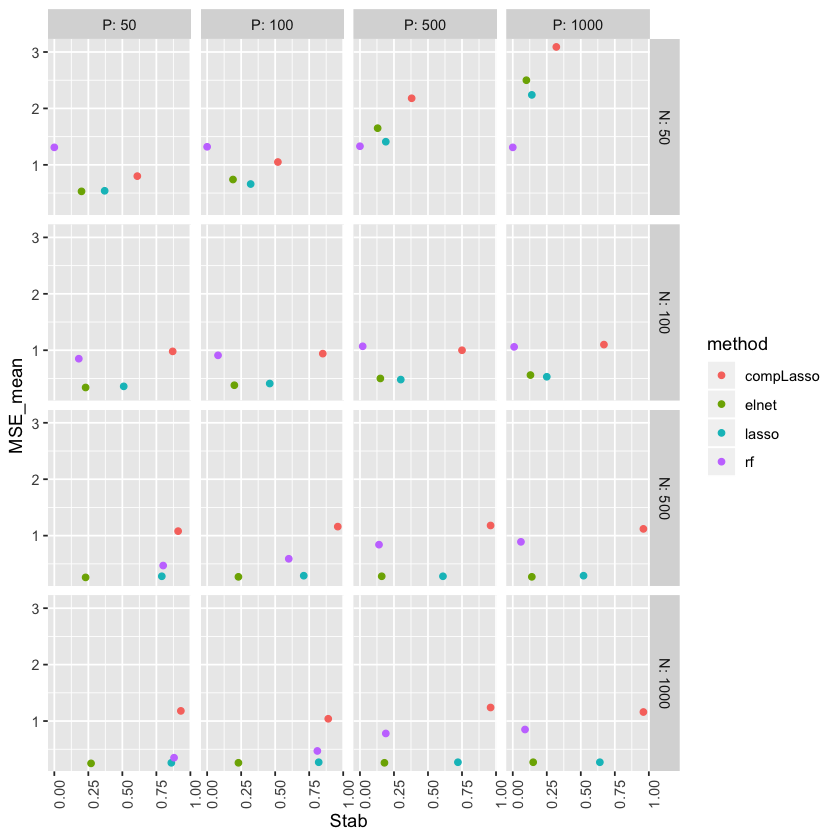

In [127]:
#facet_grid by P & N: not easy to see
ggplot(dat, aes(x=Stab, y=MSE_mean, color=method)) + geom_point() +
       facet_grid(N ~ P, labeller = label_both) +
theme(axis.text.x = element_text(angle = 90))

In [145]:
fig_mse_stab <- ggplot(dat, aes(x=Stab, y=MSE_mean, color=method, size=Ratio)) + geom_point() + 
         #theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 3, 5, 7, 9, 11)) + 
         labs(title='Independent Correlation Structure', x='Stability', y='MSE') + 
        theme(plot.title = element_text(hjust = 0.5, size=15, face="bold.italic"), 
              axis.title.x = element_text(size=14, face="bold"),
              axis.title.y = element_text(size=14, face="bold"))

fig_mse_fp <- ggplot(dat, aes(x=FP_mean, y=MSE_mean, color=method, size=Ratio)) + geom_point() + 
         #theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 3, 5, 7, 9, 11)) + 
         labs(title='Independent Correlation Structure', x='False Positives', y='MSE') + 
        theme(plot.title = element_text(hjust = 0.5, size=15, face="bold.italic"), 
              axis.title.x = element_text(size=14, face="bold"),
              axis.title.y = element_text(size=14, face="bold"))

fig_stab_fp <- ggplot(dat, aes(x=FP_mean, y=Stab, color=method, size=Ratio)) + geom_point() + 
         #theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 3, 5, 7, 9, 11)) + 
         labs(title='Independent Correlation Structure', x='False Positives', y='Stability') + 
        theme(plot.title = element_text(hjust = 0.5, size=15, face="bold.italic"), 
              axis.title.x = element_text(size=14, face="bold"),
              axis.title.y = element_text(size=14, face="bold"))

fig_mse_fn <- ggplot(dat, aes(x=FN_mean, y=MSE_mean, color=method, size=Ratio)) + geom_point() + 
         #theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 3, 5, 7, 9, 11)) + 
         labs(title='Independent Correlation Structure', x='False Negatives', y='MSE') + 
        theme(plot.title = element_text(hjust = 0.5, size=15, face="bold.italic"), 
              axis.title.x = element_text(size=14, face="bold"),
              axis.title.y = element_text(size=14, face="bold"))

fig_stab_fn <- ggplot(dat, aes(x=FN_mean, y=Stab, color=method, size=Ratio)) + geom_point() + 
         #theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 3, 5, 7, 9, 11)) + 
         labs(title='Independent Correlation Structure', x='False Negatives', y='Stability') + 
        theme(plot.title = element_text(hjust = 0.5, size=15, face="bold.italic"), 
              axis.title.x = element_text(size=14, face="bold"),
              axis.title.y = element_text(size=14, face="bold"))

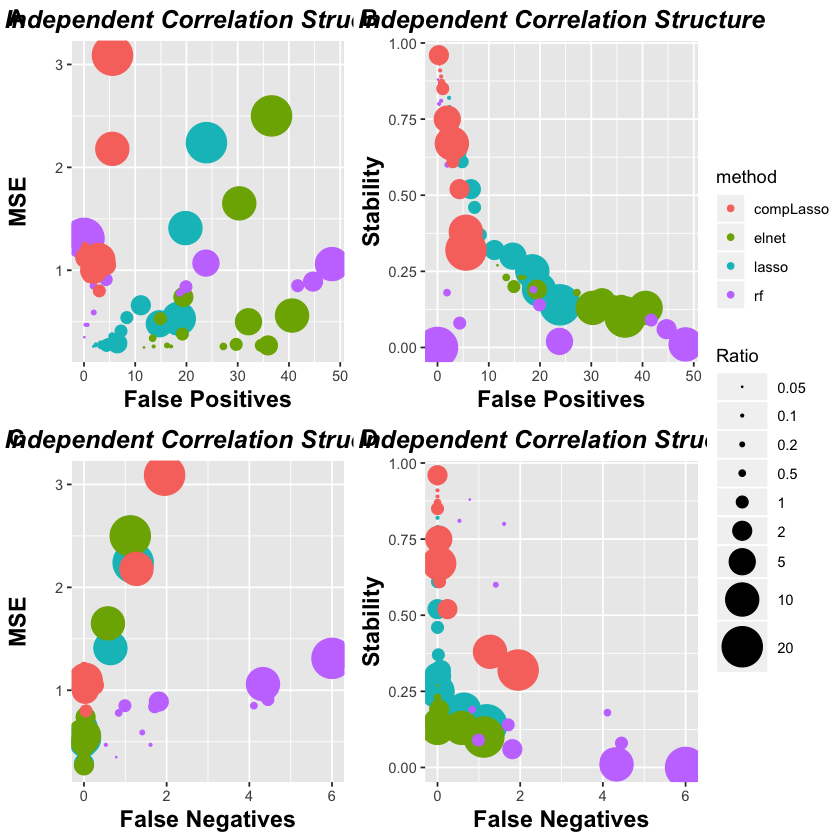

In [147]:
ggarrange(fig_mse_fp, fig_stab_fp, fig_mse_fn, fig_stab_fn, # list of plots
                  labels = "AUTO", # labels
                  common.legend = T, # COMMON LEGEND
                  legend = "right", # legend position
                  align = "hv", # Align them both, horizontal and vertical
                  nrow = 2, ncol=2)

Warning message:
“Using size for a discrete variable is not advised.”

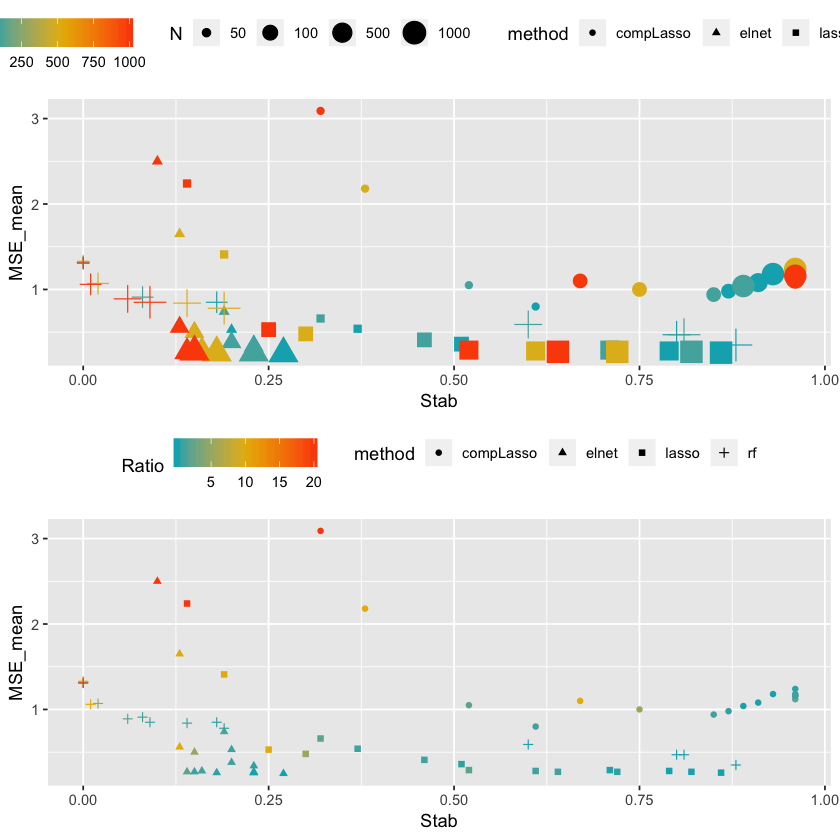

In [82]:
#fig_N <- ggplot(dat, aes(x=Stab, y=MSE_mean, color=method, size=N)) + geom_point() + theme(legend.position="top")
#fig_P <- ggplot(dat, aes(x=Stab, y=MSE_mean, color=method, size=P)) + geom_point() + theme(legend.position="top")
# fig_r <- ggplot(dat, aes(x=Stab, y=MSE_mean, color=method, size=Ratio)) + geom_point() + 
#          theme(legend.position="top") + scale_size_discrete(range = c(1,7))
fig_r <- ggplot(dat, aes(x=Stab, y=MSE_mean, color=Ratio, shape=method)) + geom_point() + 
         theme(legend.position="top") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_all <- ggplot(dat, aes(x=Stab, y=MSE_mean, color=P, size=N, shape=method)) + geom_point() + 
         theme(legend.position="top") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
grid.arrange(fig_all, fig_r, ncol=1)

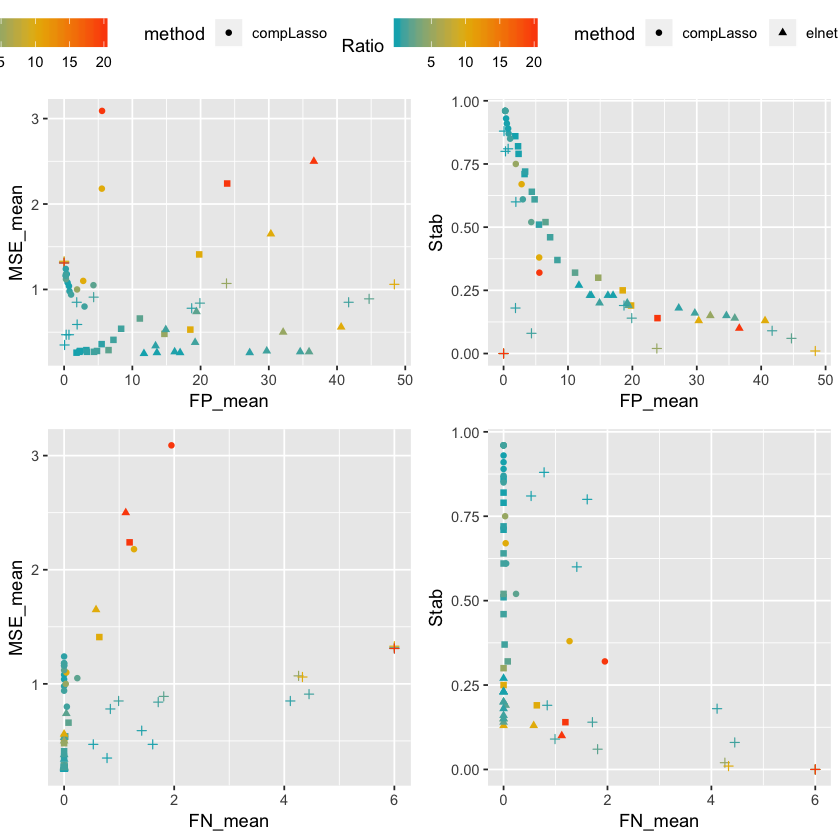

In [85]:
fig_mse_fp <- ggplot(dat, aes(x=FP_mean, y=MSE_mean, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="top") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_stab_fp <- ggplot(dat, aes(x=FP_mean, y=Stab, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="top") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_mse_fn <- ggplot(dat, aes(x=FN_mean, y=MSE_mean, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="none") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_stab_fn <- ggplot(dat, aes(x=FN_mean, y=Stab, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="none") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
grid.arrange(fig_mse_fp, fig_stab_fp, fig_mse_fn, fig_stab_fn, ncol=2)